# 01 - AVSR Baseline Evaluation

Dieses Notebook reproduziert die vier Baseline-Modelle auf dem Dev-Set und vergleicht ihre
Erkennungsleistung anhand von WER, Conversation-F1 und Joint Error Rate.
| # | Modell-Key | Beschreibung |
|---|------------|--------------|
| BL1 | `cocktail_base` | AV-HuBERT "Cocktail" (CTC/Attention, vortrainiert) |
| BL2 | `muavic_en` | MuAViC-EN + AV-HuBERT Transformer-Decoder |
| BL3 | `auto` | Auto-AVSR mit Conformer (CTC/Attention) |
| BL4 | `cocktail_fine` | AV-HuBERT "Cocktail" – MCoRec-feingetunet (**bestes Modell**) |

> **Hinweis:** `inference.main()` ist auskommentiert – die Inferenz wurde bereits in einem
> früheren Lauf ausgeführt. Die Outputs liegen unter `output_*/`. Zum Re-Run Kommentar entfernen.

## 1 – Konfiguration

`project_baseline_path` auf das lokale Repo-Verzeichnis anpassen.
`session` kann auf eine einzelne Session eingeschränkt werden (z.B. `session_132`)
oder als `"*"` belassen werden, um alle Sessions zu evaluieren.

In [5]:
project_baseline_path = "/home/josch080/Projektgruppe/mcorec_baseline" # anpassen
session = "*" # alle Sessions oder einzelne session_132
session_dir = f"data-bin/dev/{session}"

## 2 – Setup: Arbeitsverzeichnis & Imports

In [9]:
import os, sys
os.chdir(project_baseline_path)
print("CWD:", os.getcwd())

CWD: /home/josch080/Projektgruppe/mcorec_baseline


In [3]:
from script import inference

## 3 – Modell-Definitionen

Alle vier Baseline-Modelle werden in einem Dictionary definiert.
Jeder Eintrag enthält `model_type`, Pfad zum Checkpoint und Namen des Output-Verzeichnisses.

In [4]:
MODELS = {

    # BL1: AV-HuBERT "Cocktail" (CTC/Attention)
    "cocktail_base": {
        "model_type": "avsr_cocktail",
        "chkpt": "model-bin/avsr_cocktail",
        "out": "output_avsr_cocktail"
    },

    # BL2: MuAViC-EN + AV-HuBERT Transformer-Decoder
    "muavic_en": {
        "model_type": "muavic_en",
        "chkpt": "nguyenvulebinh/AV-HuBERT-MuAViC-en",
        "out": "output_muavic_en"
    },
    
    # BL3: Auto-AVSR mit Conformer (CTC/Attention)
    "auto": {
        "model_type": "auto_avsr",
        "chkpt": "model-bin/auto_avsr/avsr_trlrwlrs2lrs3vox2avsp_base.pth",
        "out": "output_auto_avsr"
    },

    # BL4: AV-HuBERT "Cocktail" (MCoRec-feingetuned)
    # Dasselbe Grundmodell wie BL1 aber auf MCoRec-Trainingsdaten feinjustiert
    "cocktail_fine": {
        "model_type": "avsr_cocktail",
        "chkpt": "model-bin/avsr_cocktail_mcorec_finetune",
        "out": "output_avsr_cocktail_finetuned"
    }
}    

## 4 – Inferenz

Die Inferenz wird für alle vier Modelle sequenziell ausgeführt.
Parameter: `beam_size=3`, `max_length=15` (Baseline-Default).

> `inference.main()` ist auskommentiert, da die Ergebnisse bereits vorliegen.
> Für einen erneuten Durchlauf die Zeile einkommentieren.

In [15]:
# Alle vier Modelle nacheinander laufen lassen

for model_key, m in MODELS.items():
    print(f"\n=========================")
    print (f"Starte Inference für Modell: {model_key}")
    print (f"model_type = {m['model_type']}")
    print (f"checkpoint_path = {m['chkpt']}")
    print (f"output_dir_name = {m['out']}")
    print (f"session_dir = {session_dir}")

    sys.argv = [
    "notebook",
    "--model_type", m["model_type"],
    "--session_dir", session_dir,
    "--checkpoint_path", m["chkpt"],
    "--beam_size", "3",
    "--max_length", "15", 
    "--output_dir_name", m["out"],

    ]
   # inference.main()


Starte Inference für Modell: cocktail_base
model_type = avsr_cocktail
checkpoint_path = model-bin/avsr_cocktail
output_dir_name = output_avsr_cocktail
session_dir = data-bin/dev_without_central_videos/dev/*
Loading avsr_cocktail model...
Loading model from model-bin/avsr_cocktail
avsr_cocktail model loaded successfully!
Inferring 25 sessions using avsr_cocktail model
Processing session session_44


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:09<05:45, 69.09s/it]


Processing speakers:  33%|███▎      | 2/6 [01:43<03:15, 48.97s/it]


Processing speakers:  50%|█████     | 3/6 [02:31<02:24, 48.12s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 15/15 [00:20<00:00,  1.39s/it]

Processing speakers:  67%|██████▋   | 4/6 [03:04<01:24, 42.37s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:50<00:43, 43.77s/it]


Processing speaker spk_5 track 1 of 3: 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]

Processing speaker spk_5 track 2 of 3: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

Processing speakers: 100%|██████████| 6/6 [04:17<00:00, 42.88s/it]


Processing session session_57


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 22/22 [01:00<00:00,  2.75s/it]

Processing speakers:  20%|██        | 1/5 [01:16<05:04, 76.14s/it]


Processing speakers:  40%|████      | 2/5 [02:00<02:51, 57.26s/it]


Processing speakers:  60%|██████    | 3/5 [02:28<01:28, 44.08s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 21/21 [00:24<00:00,  1.18s/it]

Processing speakers:  80%|████████  | 4/5 [03:14<00:44, 44.90s/it]


Processing speakers: 100%|██████████| 5/5 [04:13<00:00, 50.62s/it]


Processing session session_139


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:06<05:34, 66.88s/it]


Processing speakers:  33%|███▎      | 2/6 [02:04<04:05, 61.39s/it]


Processing speakers:  50%|█████     | 3/6 [02:44<02:34, 51.61s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 19/19 [00:18<00:00,  1.01it/s]

Processing speakers:  67%|██████▋   | 4/6 [03:11<01:23, 41.84s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:51<00:41, 41.12s/it]


Processing speakers: 100%|██████████| 6/6 [04:39<00:00, 46.57s/it]


Processing session session_133


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 23/23 [00:34<00:00,  1.48s/it]

Processing speakers:  17%|█▋        | 1/6 [00:43<03:35, 43.00s/it]


Processing speaker spk_1 track 1 of 2: 100%|██████████| 15/15 [00:23<00:00,  1.59s/it]

Processing speakers:  33%|███▎      | 2/6 [01:32<03:07, 46.90s/it]


Processing speakers:  50%|█████     | 3/6 [02:46<02:57, 59.02s/it]


Processing speakers:  67%|██████▋   | 4/6 [03:18<01:36, 48.48s/it]


Processing speakers:  83%|████████▎ | 5/6 [04:14<00:51, 51.25s/it]


Processing speakers: 100%|██████████| 6/6 [05:30<00:00, 55.13s/it]


Processing session session_134


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:12<06:02, 72.47s/it]


Processing speakers:  33%|███▎      | 2/6 [02:06<04:05, 61.43s/it]


Processing speakers:  50%|█████     | 3/6 [03:02<02:57, 59.32s/it]


Processing speakers:  67%|██████▋   | 4/6 [04:02<01:59, 59.54s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 17/17 [00:18<00:00,  1.07s/it]

Processing speakers:  83%|████████▎ | 5/6 [04:47<00:54, 54.04s/it]


Processing speakers: 100%|██████████| 6/6 [05:34<00:00, 55.72s/it]


Processing session session_50


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:31<02:35, 31.03s/it]


Processing speakers:  33%|███▎      | 2/6 [01:06<02:15, 33.93s/it]


Processing speaker spk_2 track 1 of 2: 100%|██████████| 19/19 [00:19<00:00,  1.03s/it]

Processing speakers:  50%|█████     | 3/6 [01:31<01:29, 29.67s/it]


Processing speaker spk_3 track 1 of 3: 100%|██████████| 16/16 [00:19<00:00,  1.19s/it]

Processing speaker spk_3 track 2 of 3: 100%|██████████| 12/12 [00:16<00:00,  1.36s/it]

Processing speakers:  67%|██████▋   | 4/6 [02:18<01:13, 36.62s/it]


Processing speakers:  83%|████████▎ | 5/6 [02:42<00:32, 32.10s/it]


Processing speakers: 100%|██████████| 6/6 [03:36<00:00, 36.06s/it]


Processing session session_49


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:13<01:08, 13.62s/it]


Processing speakers:  33%|███▎      | 2/6 [00:38<01:21, 20.36s/it]


Processing speaker spk_2 track 1 of 8: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

Processing speaker spk_2 track 2 of 8: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Processing speaker spk_2 track 3 of 8: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

Processing speaker spk_2 track 4 of 8: 100%|██████████| 4/4 [00:11<00:00,  2.98s/it]

Processing speaker spk_2 track 5 of 8: 100%|██████████| 2/2 [00:08<00:00,  4.19s/it]

Processing speaker spk_2 track 6 of 8: 100%|██████████| 8/8 [00:17<00:00,  2.22s/it]

Processing speaker spk_2 track 7 of 8: 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

Processing speakers:  50%|█████     | 3/6 [01:33<01:48, 36.22s/it]


Processing speakers:  67%|██████▋   | 4/6 [02:17<01:18, 39.20s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:07<00:43, 43.25s/it]


Processing speaker spk_5 track 1 of 2: 100%|██████████| 22/22 [00:38<00:00,  1.74s/it]

Processing speakers: 100%|██████████| 6/6 [04:03<00:00, 40.65s/it]


Processing session session_43


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 29/29 [00:56<00:00,  1.95s/it]

Processing speakers:  17%|█▋        | 1/6 [01:10<05:51, 70.38s/it]


Processing speakers:  33%|███▎      | 2/6 [01:48<03:25, 51.46s/it]


Processing speakers:  50%|█████     | 3/6 [02:37<02:30, 50.10s/it]


Processing speakers:  67%|██████▋   | 4/6 [03:38<01:49, 54.70s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 16/16 [00:21<00:00,  1.34s/it]

Processing speakers:  83%|████████▎ | 5/6 [04:29<00:53, 53.12s/it]


Processing speakers: 100%|██████████| 6/6 [05:13<00:00, 52.28s/it]


Processing session session_54


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 27/27 [00:41<00:00,  1.52s/it]

Processing speakers:  20%|██        | 1/5 [00:54<03:38, 54.74s/it]


Processing speakers:  40%|████      | 2/5 [02:02<03:06, 62.27s/it]


Processing speakers:  60%|██████    | 3/5 [02:50<01:52, 56.05s/it]


Processing speakers:  80%|████████  | 4/5 [04:06<01:03, 63.87s/it]


Processing speakers: 100%|██████████| 5/5 [04:47<00:00, 57.44s/it]


Processing session session_140


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:42<03:32, 42.47s/it]


Processing speakers:  33%|███▎      | 2/6 [01:19<02:37, 39.33s/it]


Processing speakers:  50%|█████     | 3/6 [02:24<02:32, 50.89s/it]


Processing speaker spk_3 track 1 of 3: 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]

Processing speaker spk_3 track 2 of 3: 100%|██████████| 11/11 [00:09<00:00,  1.12it/s]

Processing speakers:  67%|██████▋   | 4/6 [02:56<01:27, 43.62s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:34<00:41, 41.58s/it]


Processing speaker spk_5 track 1 of 3: 100%|██████████| 6/6 [00:07<00:00,  1.29s/it]

Processing speaker spk_5 track 2 of 3: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

Processing speakers: 100%|██████████| 6/6 [04:03<00:00, 40.64s/it]


Processing session session_137


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:32<02:40, 32.13s/it]


Processing speakers:  33%|███▎      | 2/6 [01:59<04:18, 64.51s/it]


Processing speakers:  50%|█████     | 3/6 [02:33<02:32, 50.86s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 20/20 [00:16<00:00,  1.18it/s]

Processing speakers:  67%|██████▋   | 4/6 [03:15<01:34, 47.13s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:58<00:45, 45.62s/it]


Processing speakers: 100%|██████████| 6/6 [04:45<00:00, 47.58s/it]


Processing session session_53


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speakers:  20%|██        | 1/5 [00:55<03:42, 55.62s/it]


Processing speakers:  40%|████      | 2/5 [01:54<02:52, 57.62s/it]


Processing speakers:  60%|██████    | 3/5 [02:43<01:46, 53.39s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 22/22 [00:56<00:00,  2.59s/it]

Processing speakers:  80%|████████  | 4/5 [03:57<01:01, 61.84s/it]


Processing speakers: 100%|██████████| 5/5 [04:37<00:00, 55.53s/it]


Processing session session_40


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:34<02:52, 34.57s/it]


Processing speakers:  33%|███▎      | 2/6 [01:46<03:45, 56.50s/it]


Processing speaker spk_2 track 1 of 3: 0it [00:00, ?it/s]

Processing speaker spk_2 track 2 of 3: 100%|██████████| 14/14 [00:36<00:00,  2.57s/it]

Processing speakers:  50%|█████     | 3/6 [02:55<03:06, 62.15s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 18/18 [00:40<00:00,  2.28s/it]

Processing speakers:  67%|██████▋   | 4/6 [03:58<02:04, 62.49s/it]


Processing speakers:  83%|████████▎ | 5/6 [04:49<00:58, 58.28s/it]


Processing speakers: 100%|██████████| 6/6 [05:50<00:00, 58.39s/it]


Processing session session_42


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 12/12 [00:11<00:00,  1.04it/s]

Processing speakers:  17%|█▋        | 1/6 [00:40<03:22, 40.59s/it]


Processing speakers:  33%|███▎      | 2/6 [01:51<03:52, 58.13s/it]


Processing speakers:  50%|█████     | 3/6 [03:11<03:24, 68.12s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]

Processing speakers:  67%|██████▋   | 4/6 [03:57<01:58, 59.42s/it]


Processing speakers:  83%|████████▎ | 5/6 [04:52<00:57, 57.90s/it]


Processing speakers: 100%|██████████| 6/6 [05:33<00:00, 55.63s/it]


Processing session session_48


Processing speakers:   0%|          | 0/3 [00:00<?, ?it/s]


Processing speaker spk_1 track 1 of 3: 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

Processing speaker spk_1 track 2 of 3: 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

Processing speakers:  33%|███▎      | 1/3 [00:44<01:29, 44.83s/it]


Processing speakers:  67%|██████▋   | 2/3 [01:10<00:33, 33.34s/it]


Processing speaker spk_3 track 1 of 10: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

Processing speaker spk_3 track 2 of 10: 0it [00:00, ?it/s]

Processing speaker spk_3 track 3 of 10: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

Processing speaker spk_3 track 4 of 10: 100%|██████████| 10/10 [00:12<00:00,  1.26s/it]

Processing speaker spk_3 track 5 of 10: 100%|██████████| 8/8 [00:16<00:00,  2.02s/it]

Processing speaker spk_3 track 6 of 10: 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

Processing speaker spk_3 track 7 of 10: 100%|██████████| 2/2 [00:07<00:00,  3.83s/it]

Processing speaker spk_3 track 8 of 10: 100%|██████████| 2/2 [00:05<00:00,  2.77s/it]

Processing speaker spk_3 track 9 of 10: 0it [00:00, ?it/s]

Processing speakers: 100%|██████████| 3/3 [02:02<00:00, 40.96s/it]


Processing session session_135


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 15/15 [00:19<00:00,  1.29s/it]

Processing speakers:  20%|██        | 1/5 [00:50<03:23, 50.76s/it]


Processing speakers:  40%|████      | 2/5 [01:42<02:33, 51.26s/it]


Processing speakers:  60%|██████    | 3/5 [02:58<02:04, 62.48s/it]


Processing speakers:  80%|████████  | 4/5 [03:45<00:56, 56.45s/it]


Processing speakers: 100%|██████████| 5/5 [04:48<00:00, 57.74s/it]


Processing session session_51


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:38<03:10, 38.17s/it]


Processing speaker spk_1 track 1 of 2: 100%|██████████| 14/14 [00:27<00:00,  1.93s/it]

Processing speakers:  33%|███▎      | 2/6 [01:29<03:02, 45.71s/it]


Processing speakers:  50%|█████     | 3/6 [01:53<01:48, 36.02s/it]


Processing speakers:  67%|██████▋   | 4/6 [03:12<01:46, 53.07s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:54<00:48, 48.86s/it]


Processing speakers: 100%|██████████| 6/6 [04:23<00:00, 43.85s/it]


Processing session session_56


Processing speakers:   0%|          | 0/4 [00:00<?, ?it/s]


Processing speakers:  25%|██▌       | 1/4 [00:28<01:24, 28.13s/it]


Processing speakers:  50%|█████     | 2/4 [01:47<01:56, 58.38s/it]


Processing speakers:  75%|███████▌  | 3/4 [03:00<01:04, 64.79s/it]


Processing speakers: 100%|██████████| 4/4 [03:12<00:00, 48.18s/it]


Processing session session_132


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:26<07:10, 86.04s/it]


Processing speakers:  33%|███▎      | 2/6 [02:18<04:26, 66.55s/it]


Processing speakers:  50%|█████     | 3/6 [03:35<03:33, 71.17s/it]


Processing speakers:  67%|██████▋   | 4/6 [04:10<01:53, 56.71s/it]


Processing speakers:  83%|████████▎ | 5/6 [04:59<00:54, 54.03s/it]


Processing speaker spk_5 track 1 of 5: 100%|██████████| 12/12 [00:19<00:00,  1.60s/it]

Processing speaker spk_5 track 2 of 5: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

Processing speaker spk_5 track 3 of 5: 100%|██████████| 12/12 [00:16<00:00,  1.38s/it]

Processing speaker spk_5 track 4 of 5: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]

Processing speakers: 100%|██████████| 6/6 [05:42<00:00, 57.16s/it]


Processing session session_138


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:25<02:08, 25.75s/it]


Processing speakers:  33%|███▎      | 2/6 [01:45<03:48, 57.22s/it]


Processing speakers:  50%|█████     | 3/6 [02:25<02:28, 49.37s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 23/23 [00:33<00:00,  1.44s/it]

Processing speakers:  67%|██████▋   | 4/6 [03:11<01:36, 48.22s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:42<00:41, 41.92s/it]


Processing speaker spk_5 track 1 of 4: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

Processing speaker spk_5 track 2 of 4: 100%|██████████| 15/15 [00:27<00:00,  1.84s/it]

Processing speaker spk_5 track 3 of 4: 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

Processing speakers: 100%|██████████| 6/6 [04:22<00:00, 43.72s/it]


Processing session session_41


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 19/19 [00:20<00:00,  1.07s/it]

Processing speakers:  17%|█▋        | 1/6 [00:21<01:46, 21.27s/it]


Processing speaker spk_1 track 1 of 2: 0it [00:00, ?it/s]

Processing speakers:  33%|███▎      | 2/6 [01:48<04:00, 60.17s/it]


Processing speaker spk_2 track 1 of 2: 0it [00:00, ?it/s]

Processing speakers:  50%|█████     | 3/6 [02:55<03:09, 63.31s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 4/4 [00:05<00:00,  1.44s/it]

Processing speakers:  67%|██████▋   | 4/6 [03:38<01:50, 55.14s/it]


Processing speakers:  83%|████████▎ | 5/6 [04:28<00:53, 53.17s/it]


Processing speaker spk_5 track 1 of 2: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it]

Processing speakers: 100%|██████████| 6/6 [05:17<00:00, 52.88s/it]


Processing session session_136


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:12<06:01, 72.20s/it]


Processing speakers:  33%|███▎      | 2/6 [01:55<03:40, 55.22s/it]


Processing speakers:  50%|█████     | 3/6 [02:40<02:31, 50.44s/it]


Processing speakers:  67%|██████▋   | 4/6 [03:33<01:42, 51.38s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 20/20 [01:00<00:00,  3.01s/it]

Processing speakers:  83%|████████▎ | 5/6 [04:43<00:58, 58.23s/it]


Processing speakers: 100%|██████████| 6/6 [05:12<00:00, 52.04s/it]


Processing session session_141


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speakers:  20%|██        | 1/5 [00:40<02:43, 40.76s/it]


Processing speakers:  40%|████      | 2/5 [01:33<02:24, 48.01s/it]


Processing speakers:  60%|██████    | 3/5 [02:18<01:33, 46.55s/it]


Processing speakers:  80%|████████  | 4/5 [02:47<00:39, 39.62s/it]


Processing speakers: 100%|██████████| 5/5 [03:23<00:00, 40.62s/it]


Processing session session_52


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:33<02:46, 33.25s/it]


Processing speakers:  33%|███▎      | 2/6 [00:50<01:34, 23.57s/it]


Processing speaker spk_2 track 1 of 2: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

Processing speakers:  50%|█████     | 3/6 [02:05<02:21, 47.15s/it]


Processing speakers:  67%|██████▋   | 4/6 [02:40<01:25, 42.63s/it]


Processing speakers:  83%|████████▎ | 5/6 [02:58<00:33, 33.69s/it]


Processing speakers: 100%|██████████| 6/6 [04:30<00:00, 45.14s/it]


Processing session session_55


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 24/24 [00:36<00:00,  1.53s/it]

Processing speakers:  20%|██        | 1/5 [00:59<03:59, 59.96s/it]


Processing speakers:  40%|████      | 2/5 [02:11<03:20, 66.75s/it]


Processing speakers:  60%|██████    | 3/5 [03:00<01:57, 58.78s/it]


Processing speakers:  80%|████████  | 4/5 [03:17<00:42, 42.01s/it]


Processing speakers: 100%|██████████| 5/5 [04:51<00:00, 58.26s/it]



Starte Inference für Modell: muavic_en
model_type = muavic_en
checkpoint_path = nguyenvulebinh/AV-HuBERT-MuAViC-en
output_dir_name = output_muavic_en
session_dir = data-bin/dev_without_central_videos/dev/*
Loading muavic_en model...
Loading model from nguyenvulebinh/AV-HuBERT-MuAViC-en
muavic_en model loaded successfully!
Inferring 25 sessions using muavic_en model
Processing session session_44


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:15<01:18, 15.68s/it]


Processing speakers:  33%|███▎      | 2/6 [00:28<00:55, 13.86s/it]


Processing speakers:  50%|█████     | 3/6 [00:40<00:38, 12.90s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 15/15 [00:04<00:00,  3.59it/s]

Processing speakers:  67%|██████▋   | 4/6 [00:48<00:21, 10.97s/it]


Processing speakers:  83%|████████▎ | 5/6 [01:01<00:11, 12.00s/it]


Processing speaker spk_5 track 1 of 3: 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]

Processing speaker spk_5 track 2 of 3: 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

Processing speakers: 100%|██████████| 6/6 [01:10<00:00, 11.74s/it]


Processing session session_57


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 22/22 [00:10<00:00,  2.14it/s]

Processing speakers:  20%|██        | 1/5 [00:12<00:49, 12.41s/it]


Processing speakers:  40%|████      | 2/5 [00:19<00:28,  9.47s/it]


Processing speakers:  60%|██████    | 3/5 [00:27<00:17,  8.82s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 21/21 [00:05<00:00,  3.73it/s]

Processing speakers:  80%|████████  | 4/5 [00:38<00:09,  9.37s/it]


Processing speakers: 100%|██████████| 5/5 [00:50<00:00, 10.01s/it]


Processing session session_139


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:12<01:04, 12.80s/it]


Processing speakers:  33%|███▎      | 2/6 [00:26<00:54, 13.51s/it]


Processing speakers:  50%|█████     | 3/6 [00:37<00:36, 12.01s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 19/19 [00:05<00:00,  3.21it/s]

Processing speakers:  67%|██████▋   | 4/6 [00:45<00:20, 10.44s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:56<00:10, 10.86s/it]


Processing speakers: 100%|██████████| 6/6 [01:08<00:00, 11.43s/it]


Processing session session_133


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 23/23 [00:09<00:00,  2.38it/s]

Processing speakers:  17%|█▋        | 1/6 [00:11<00:59, 11.90s/it]


Processing speaker spk_1 track 1 of 2: 100%|██████████| 15/15 [00:04<00:00,  3.33it/s]

Processing speakers:  33%|███▎      | 2/6 [00:22<00:45, 11.33s/it]


Processing speakers:  50%|█████     | 3/6 [00:35<00:36, 12.10s/it]


Processing speakers:  67%|██████▋   | 4/6 [00:43<00:20, 10.43s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:56<00:11, 11.27s/it]


Processing speakers: 100%|██████████| 6/6 [01:10<00:00, 11.83s/it]


Processing session session_134


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:13<01:05, 13.13s/it]


Processing speakers:  33%|███▎      | 2/6 [00:25<00:50, 12.53s/it]


Processing speakers:  50%|█████     | 3/6 [00:34<00:33, 11.04s/it]


Processing speakers:  67%|██████▋   | 4/6 [00:44<00:21, 10.80s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 17/17 [00:04<00:00,  3.73it/s]

Processing speakers:  83%|████████▎ | 5/6 [00:57<00:11, 11.54s/it]


Processing speakers: 100%|██████████| 6/6 [01:10<00:00, 11.78s/it]


Processing session session_50


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:09<00:45,  9.13s/it]


Processing speakers:  33%|███▎      | 2/6 [00:17<00:35,  8.89s/it]


Processing speaker spk_2 track 1 of 2: 100%|██████████| 19/19 [00:05<00:00,  3.51it/s]

Processing speakers:  50%|█████     | 3/6 [00:25<00:24,  8.29s/it]


Processing speaker spk_3 track 1 of 3: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]

Processing speaker spk_3 track 2 of 3: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

Processing speakers:  67%|██████▋   | 4/6 [00:35<00:18,  9.15s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:44<00:08,  8.82s/it]


Processing speakers: 100%|██████████| 6/6 [00:57<00:00,  9.51s/it]


Processing session session_49


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:03<00:17,  3.56s/it]


Processing speakers:  33%|███▎      | 2/6 [00:09<00:18,  4.71s/it]


Processing speaker spk_2 track 1 of 8: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

Processing speaker spk_2 track 2 of 8: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

Processing speaker spk_2 track 3 of 8: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

Processing speaker spk_2 track 4 of 8: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

Processing speaker spk_2 track 5 of 8: 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

Processing speaker spk_2 track 6 of 8: 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

Processing speaker spk_2 track 7 of 8: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

Processing speakers:  50%|█████     | 3/6 [00:17<00:19,  6.51s/it]


Processing speakers:  67%|██████▋   | 4/6 [00:26<00:14,  7.31s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:35<00:08,  8.13s/it]


Processing speaker spk_5 track 1 of 2: 100%|██████████| 22/22 [00:07<00:00,  3.02it/s]

Processing speakers: 100%|██████████| 6/6 [00:45<00:00,  7.62s/it]


Processing session session_43


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 29/29 [00:12<00:00,  2.40it/s]

Processing speakers:  17%|█▋        | 1/6 [00:14<01:11, 14.22s/it]


Processing speakers:  33%|███▎      | 2/6 [00:25<00:49, 12.33s/it]


Processing speakers:  50%|█████     | 3/6 [00:36<00:35, 11.87s/it]


Processing speakers:  67%|██████▋   | 4/6 [00:49<00:24, 12.13s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 16/16 [00:05<00:00,  3.18it/s]

Processing speakers:  83%|████████▎ | 5/6 [00:58<00:11, 11.32s/it]


Processing speakers: 100%|██████████| 6/6 [01:13<00:00, 12.25s/it]


Processing session session_54


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 27/27 [00:08<00:00,  3.03it/s]

Processing speakers:  20%|██        | 1/5 [00:10<00:42, 10.58s/it]


Processing speakers:  40%|████      | 2/5 [00:22<00:34, 11.36s/it]


Processing speakers:  60%|██████    | 3/5 [00:33<00:22, 11.34s/it]


Processing speakers:  80%|████████  | 4/5 [00:48<00:12, 12.62s/it]


Processing speakers: 100%|██████████| 5/5 [00:59<00:00, 11.96s/it]


Processing session session_140


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:09<00:45,  9.10s/it]


Processing speakers:  33%|███▎      | 2/6 [00:19<00:38,  9.69s/it]


Processing speakers:  50%|█████     | 3/6 [00:32<00:34, 11.50s/it]


Processing speaker spk_3 track 1 of 3: 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]

Processing speaker spk_3 track 2 of 3: 100%|██████████| 11/11 [00:02<00:00,  4.35it/s]

Processing speakers:  67%|██████▋   | 4/6 [00:39<00:19,  9.62s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:53<00:11, 11.08s/it]


Processing speaker spk_5 track 1 of 3: 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

Processing speaker spk_5 track 2 of 3: 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]

Processing speakers: 100%|██████████| 6/6 [01:01<00:00, 10.20s/it]


Processing session session_137


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:09<00:48,  9.71s/it]


Processing speakers:  33%|███▎      | 2/6 [00:22<00:46, 11.70s/it]


Processing speakers:  50%|█████     | 3/6 [00:32<00:32, 10.72s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 20/20 [00:05<00:00,  3.85it/s]

Processing speakers:  67%|██████▋   | 4/6 [00:42<00:20, 10.37s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:57<00:12, 12.04s/it]


Processing speakers: 100%|██████████| 6/6 [01:05<00:00, 10.94s/it]


Processing session session_53


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speakers:  20%|██        | 1/5 [00:12<00:50, 12.71s/it]


Processing speakers:  40%|████      | 2/5 [00:24<00:35, 11.99s/it]


Processing speakers:  60%|██████    | 3/5 [00:34<00:22, 11.27s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 22/22 [00:09<00:00,  2.28it/s]

Processing speakers:  80%|████████  | 4/5 [00:46<00:11, 11.42s/it]


Processing speakers: 100%|██████████| 5/5 [00:54<00:00, 10.99s/it]


Processing session session_40


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:11<00:55, 11.04s/it]


Processing speakers:  33%|███▎      | 2/6 [00:26<00:55, 13.90s/it]


Processing speaker spk_2 track 1 of 3: 0it [00:00, ?it/s]

Processing speaker spk_2 track 2 of 3: 100%|██████████| 14/14 [00:04<00:00,  2.91it/s]

Processing speakers:  50%|█████     | 3/6 [00:36<00:35, 11.86s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 18/18 [00:06<00:00,  2.61it/s]

Processing speakers:  67%|██████▋   | 4/6 [00:48<00:24, 12.09s/it]


Processing speakers:  83%|████████▎ | 5/6 [01:00<00:11, 11.83s/it]


Processing speakers: 100%|██████████| 6/6 [01:13<00:00, 12.30s/it]


Processing session session_42


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

Processing speakers:  17%|█▋        | 1/6 [00:11<00:55, 11.17s/it]


Processing speakers:  33%|███▎      | 2/6 [00:26<00:55, 13.76s/it]


Processing speakers:  50%|█████     | 3/6 [00:42<00:44, 14.67s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

Processing speakers:  67%|██████▋   | 4/6 [00:53<00:26, 13.11s/it]


Processing speakers:  83%|████████▎ | 5/6 [01:07<00:13, 13.47s/it]


Processing speakers: 100%|██████████| 6/6 [01:17<00:00, 12.91s/it]


Processing session session_48


Processing speakers:   0%|          | 0/3 [00:00<?, ?it/s]


Processing speaker spk_1 track 1 of 3: 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

Processing speaker spk_1 track 2 of 3: 100%|██████████| 6/6 [00:01<00:00,  4.79it/s]

Processing speakers:  33%|███▎      | 1/3 [00:08<00:17,  8.97s/it]


Processing speakers:  67%|██████▋   | 2/3 [00:13<00:06,  6.11s/it]


Processing speaker spk_3 track 1 of 10: 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]

Processing speaker spk_3 track 2 of 10: 0it [00:00, ?it/s]

Processing speaker spk_3 track 3 of 10: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

Processing speaker spk_3 track 4 of 10: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

Processing speaker spk_3 track 5 of 10: 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

Processing speaker spk_3 track 6 of 10: 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

Processing speaker spk_3 track 7 of 10: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

Processing speaker spk_3 track 8 of 10: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

Processing speaker spk_3 track 9 of 10: 0it [00:00, ?it/s]

Processing speakers: 100%|██████████| 3/3 [00:24<00:00,  8.28s/it]


Processing session session_135


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 15/15 [00:03<00:00,  3.81it/s]

Processing speakers:  20%|██        | 1/5 [00:10<00:42, 10.61s/it]


Processing speakers:  40%|████      | 2/5 [00:23<00:36, 12.12s/it]


Processing speakers:  60%|██████    | 3/5 [00:35<00:24, 12.09s/it]


Processing speakers:  80%|████████  | 4/5 [00:45<00:11, 11.19s/it]


Processing speakers: 100%|██████████| 5/5 [00:58<00:00, 11.80s/it]


Processing session session_51


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:08<00:42,  8.52s/it]


Processing speaker spk_1 track 1 of 2: 100%|██████████| 14/14 [00:05<00:00,  2.74it/s]

Processing speakers:  33%|███▎      | 2/6 [00:17<00:34,  8.71s/it]


Processing speakers:  50%|█████     | 3/6 [00:22<00:21,  7.11s/it]


Processing speakers:  67%|██████▋   | 4/6 [00:36<00:19,  9.99s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:48<00:10, 10.55s/it]


Processing speakers: 100%|██████████| 6/6 [00:58<00:00,  9.83s/it]


Processing session session_56


Processing speakers:   0%|          | 0/4 [00:00<?, ?it/s]


Processing speakers:  25%|██▌       | 1/4 [00:07<00:23,  7.75s/it]


Processing speakers:  50%|█████     | 2/4 [00:21<00:22, 11.40s/it]


Processing speakers:  75%|███████▌  | 3/4 [00:36<00:12, 12.94s/it]


Processing speakers: 100%|██████████| 4/4 [00:41<00:00, 10.28s/it]


Processing session session_132


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:14<01:11, 14.36s/it]


Processing speakers:  33%|███▎      | 2/6 [00:27<00:54, 13.67s/it]


Processing speakers:  50%|█████     | 3/6 [00:40<00:39, 13.14s/it]


Processing speakers:  67%|██████▋   | 4/6 [00:46<00:21, 10.67s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:59<00:11, 11.27s/it]


Processing speaker spk_5 track 1 of 5: 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]

Processing speaker spk_5 track 2 of 5: 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]

Processing speaker spk_5 track 3 of 5: 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]

Processing speaker spk_5 track 4 of 5: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

Processing speakers: 100%|██████████| 6/6 [01:08<00:00, 11.45s/it]


Processing session session_138


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:09<00:48,  9.63s/it]


Processing speakers:  33%|███▎      | 2/6 [00:22<00:46, 11.60s/it]


Processing speakers:  50%|█████     | 3/6 [00:33<00:33, 11.12s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]

Processing speakers:  67%|██████▋   | 4/6 [00:42<00:21, 10.61s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:54<00:10, 10.86s/it]


Processing speaker spk_5 track 1 of 4: 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

Processing speaker spk_5 track 2 of 4: 100%|██████████| 15/15 [00:04<00:00,  3.13it/s]

Processing speaker spk_5 track 3 of 4: 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

Processing speakers: 100%|██████████| 6/6 [01:04<00:00, 10.69s/it]


Processing session session_41


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 19/19 [00:06<00:00,  2.97it/s]

Processing speakers:  17%|█▋        | 1/6 [00:06<00:33,  6.78s/it]


Processing speaker spk_1 track 1 of 2: 0it [00:00, ?it/s]

Processing speakers:  33%|███▎      | 2/6 [00:18<00:38,  9.73s/it]


Processing speaker spk_2 track 1 of 2: 0it [00:00, ?it/s]

Processing speakers:  50%|█████     | 3/6 [00:30<00:32, 10.71s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

Processing speakers:  67%|██████▋   | 4/6 [00:39<00:20, 10.10s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:50<00:10, 10.47s/it]


Processing speaker spk_5 track 1 of 2: 100%|██████████| 30/30 [00:12<00:00,  2.42it/s]

Processing speakers: 100%|██████████| 6/6 [01:03<00:00, 10.55s/it]


Processing session session_136


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:11<00:57, 11.52s/it]


Processing speakers:  33%|███▎      | 2/6 [00:20<00:39,  9.96s/it]


Processing speakers:  50%|█████     | 3/6 [00:32<00:33, 11.10s/it]


Processing speakers:  67%|██████▋   | 4/6 [00:45<00:23, 11.81s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

Processing speakers:  83%|████████▎ | 5/6 [00:56<00:11, 11.59s/it]


Processing speakers: 100%|██████████| 6/6 [01:05<00:00, 10.99s/it]


Processing session session_141


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speakers:  20%|██        | 1/5 [00:11<00:47, 11.84s/it]


Processing speakers:  40%|████      | 2/5 [00:23<00:35, 11.84s/it]


Processing speakers:  60%|██████    | 3/5 [00:36<00:24, 12.22s/it]


Processing speakers:  80%|████████  | 4/5 [00:47<00:11, 11.78s/it]


Processing speakers: 100%|██████████| 5/5 [00:59<00:00, 11.94s/it]


Processing session session_52


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:09<00:45,  9.01s/it]


Processing speakers:  33%|███▎      | 2/6 [00:13<00:25,  6.31s/it]


Processing speaker spk_2 track 1 of 2: 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

Processing speakers:  50%|█████     | 3/6 [00:26<00:28,  9.45s/it]


Processing speakers:  67%|██████▋   | 4/6 [00:36<00:19,  9.59s/it]


Processing speakers:  83%|████████▎ | 5/6 [00:43<00:08,  8.59s/it]


Processing speakers: 100%|██████████| 6/6 [00:56<00:00,  9.48s/it]


Processing session session_55


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 24/24 [00:07<00:00,  3.16it/s]

Processing speakers:  20%|██        | 1/5 [00:11<00:47, 11.91s/it]


Processing speakers:  40%|████      | 2/5 [00:23<00:34, 11.51s/it]


Processing speakers:  60%|██████    | 3/5 [00:34<00:23, 11.65s/it]


Processing speakers:  80%|████████  | 4/5 [00:40<00:09,  9.33s/it]


Processing speakers: 100%|██████████| 5/5 [00:55<00:00, 11.09s/it]



Starte Inference für Modell: auto
model_type = auto_avsr
checkpoint_path = model-bin/auto_avsr/avsr_trlrwlrs2lrs3vox2avsp_base.pth
output_dir_name = output_auto_avsr
session_dir = data-bin/dev_without_central_videos/dev/*
Loading auto_avsr model...
Loading model from model-bin/auto_avsr/avsr_trlrwlrs2lrs3vox2avsp_base.pth
auto_avsr model loaded successfully!
Inferring 25 sessions using auto_avsr model
Processing session session_44


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:48<04:04, 48.98s/it]


Processing speakers:  33%|███▎      | 2/6 [01:18<02:30, 37.64s/it]


Processing speakers:  50%|█████     | 3/6 [01:52<01:47, 35.96s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 15/15 [00:14<00:00,  1.07it/s]

Processing speakers:  67%|██████▋   | 4/6 [02:16<01:02, 31.26s/it]


Processing speakers:  83%|████████▎ | 5/6 [02:52<00:32, 32.87s/it]


Processing speaker spk_5 track 1 of 3: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]

Processing speaker spk_5 track 2 of 3: 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

Processing speakers: 100%|██████████| 6/6 [03:16<00:00, 32.82s/it]


Processing session session_57


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 22/22 [00:56<00:00,  2.56s/it]

Processing speakers:  20%|██        | 1/5 [01:11<04:45, 71.26s/it]


Processing speakers:  40%|████      | 2/5 [01:47<02:32, 50.87s/it]


Processing speakers:  60%|██████    | 3/5 [02:12<01:17, 38.95s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 21/21 [00:20<00:00,  1.05it/s]

Processing speakers:  80%|████████  | 4/5 [02:51<00:38, 39.00s/it]


Processing speakers: 100%|██████████| 5/5 [03:44<00:00, 44.81s/it]


Processing session session_139


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:45<03:47, 45.52s/it]


Processing speakers:  33%|███▎      | 2/6 [01:31<03:04, 46.07s/it]


Processing speakers:  50%|█████     | 3/6 [02:03<01:58, 39.46s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 19/19 [00:15<00:00,  1.20it/s]

Processing speakers:  67%|██████▋   | 4/6 [02:25<01:05, 32.60s/it]


Processing speakers:  83%|████████▎ | 5/6 [02:57<00:32, 32.47s/it]


Processing speakers: 100%|██████████| 6/6 [03:34<00:00, 35.73s/it]


Processing session session_133


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 23/23 [00:27<00:00,  1.19s/it]

Processing speakers:  17%|█▋        | 1/6 [00:33<02:49, 33.99s/it]


Processing speaker spk_1 track 1 of 2: 100%|██████████| 15/15 [00:16<00:00,  1.13s/it]

Processing speakers:  33%|███▎      | 2/6 [01:10<02:22, 35.64s/it]


Processing speakers:  50%|█████     | 3/6 [02:03<02:10, 43.38s/it]


Processing speakers:  67%|██████▋   | 4/6 [02:30<01:13, 36.84s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:06<00:36, 36.60s/it]


Processing speakers: 100%|██████████| 6/6 [03:59<00:00, 39.84s/it]


Processing session session_134


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:39<03:17, 39.52s/it]


Processing speakers:  33%|███▎      | 2/6 [01:13<02:24, 36.23s/it]


Processing speakers:  50%|█████     | 3/6 [01:47<01:45, 35.11s/it]


Processing speakers:  67%|██████▋   | 4/6 [02:20<01:08, 34.33s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 17/17 [00:12<00:00,  1.33it/s]

Processing speakers:  83%|████████▎ | 5/6 [02:51<00:33, 33.28s/it]


Processing speakers: 100%|██████████| 6/6 [03:26<00:00, 34.39s/it]


Processing session session_50


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:27<02:18, 27.66s/it]


Processing speakers:  33%|███▎      | 2/6 [01:01<02:05, 31.34s/it]


Processing speaker spk_2 track 1 of 2: 100%|██████████| 19/19 [00:17<00:00,  1.09it/s]

Processing speakers:  50%|█████     | 3/6 [01:25<01:23, 27.82s/it]


Processing speaker spk_3 track 1 of 3: 100%|██████████| 16/16 [00:15<00:00,  1.04it/s]

Processing speaker spk_3 track 2 of 3: 100%|██████████| 12/12 [00:12<00:00,  1.08s/it]

Processing speakers:  67%|██████▋   | 4/6 [02:04<01:04, 32.27s/it]


Processing speakers:  83%|████████▎ | 5/6 [02:27<00:29, 29.02s/it]


Processing speakers: 100%|██████████| 6/6 [03:18<00:00, 33.16s/it]


Processing session session_49


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:13<01:05, 13.15s/it]


Processing speakers:  33%|███▎      | 2/6 [00:36<01:16, 19.09s/it]


Processing speaker spk_2 track 1 of 8: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

Processing speaker spk_2 track 2 of 8: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

Processing speaker spk_2 track 3 of 8: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

Processing speaker spk_2 track 4 of 8: 100%|██████████| 4/4 [00:11<00:00,  2.85s/it]

Processing speaker spk_2 track 5 of 8: 100%|██████████| 2/2 [00:07<00:00,  3.82s/it]

Processing speaker spk_2 track 6 of 8: 100%|██████████| 8/8 [00:15<00:00,  1.90s/it]

Processing speaker spk_2 track 7 of 8: 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

Processing speakers:  50%|█████     | 3/6 [01:28<01:42, 34.01s/it]


Processing speakers:  67%|██████▋   | 4/6 [02:06<01:11, 35.57s/it]


Processing speakers:  83%|████████▎ | 5/6 [02:55<00:40, 40.49s/it]


Processing speaker spk_5 track 1 of 2: 100%|██████████| 22/22 [00:29<00:00,  1.33s/it]

Processing speakers: 100%|██████████| 6/6 [03:37<00:00, 36.29s/it]


Processing session session_43


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 29/29 [00:34<00:00,  1.18s/it]

Processing speakers:  17%|█▋        | 1/6 [00:44<03:44, 44.87s/it]


Processing speakers:  33%|███▎      | 2/6 [01:15<02:25, 36.37s/it]


Processing speakers:  50%|█████     | 3/6 [01:57<01:57, 39.14s/it]


Processing speakers:  67%|██████▋   | 4/6 [02:39<01:20, 40.06s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 16/16 [00:16<00:00,  1.03s/it]

Processing speakers:  83%|████████▎ | 5/6 [03:16<00:38, 38.97s/it]


Processing speakers: 100%|██████████| 6/6 [03:51<00:00, 38.59s/it]


Processing session session_54


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 27/27 [00:36<00:00,  1.35s/it]

Processing speakers:  20%|██        | 1/5 [00:50<03:23, 50.96s/it]


Processing speakers:  40%|████      | 2/5 [01:52<02:52, 57.46s/it]


Processing speakers:  60%|██████    | 3/5 [02:38<01:43, 51.93s/it]


Processing speakers:  80%|████████  | 4/5 [03:39<00:55, 55.50s/it]


Processing speakers: 100%|██████████| 5/5 [04:14<00:00, 50.80s/it]


Processing session session_140


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:32<02:40, 32.18s/it]


Processing speakers:  33%|███▎      | 2/6 [01:00<02:00, 30.16s/it]


Processing speakers:  50%|█████     | 3/6 [01:56<02:05, 41.89s/it]


Processing speaker spk_3 track 1 of 3: 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]

Processing speaker spk_3 track 2 of 3: 100%|██████████| 11/11 [00:09<00:00,  1.16it/s]

Processing speakers:  67%|██████▋   | 4/6 [02:25<01:13, 36.64s/it]


Processing speakers:  83%|████████▎ | 5/6 [02:56<00:34, 34.63s/it]


Processing speaker spk_5 track 1 of 3: 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

Processing speaker spk_5 track 2 of 3: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

Processing speakers: 100%|██████████| 6/6 [03:20<00:00, 33.42s/it]


Processing session session_137


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:24<02:00, 24.05s/it]


Processing speakers:  33%|███▎      | 2/6 [01:23<03:00, 45.02s/it]


Processing speakers:  50%|█████     | 3/6 [01:49<01:49, 36.38s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]

Processing speakers:  67%|██████▋   | 4/6 [02:25<01:12, 36.16s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:03<00:36, 36.93s/it]


Processing speakers: 100%|██████████| 6/6 [03:36<00:00, 36.08s/it]


Processing session session_53


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speakers:  20%|██        | 1/5 [00:57<03:49, 57.43s/it]


Processing speakers:  40%|████      | 2/5 [01:55<02:53, 57.88s/it]


Processing speakers:  60%|██████    | 3/5 [02:40<01:44, 52.15s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 22/22 [00:54<00:00,  2.46s/it]

Processing speakers:  80%|████████  | 4/5 [03:52<00:59, 59.70s/it]


Processing speakers: 100%|██████████| 5/5 [04:27<00:00, 53.58s/it]


Processing session session_40


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:29<02:28, 29.65s/it]


Processing speakers:  33%|███▎      | 2/6 [01:19<02:45, 41.30s/it]


Processing speaker spk_2 track 1 of 3: 0it [00:00, ?it/s]

Processing speaker spk_2 track 2 of 3: 100%|██████████| 14/14 [00:22<00:00,  1.59s/it]

Processing speakers:  50%|█████     | 3/6 [02:00<02:04, 41.53s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 18/18 [00:24<00:00,  1.35s/it]

Processing speakers:  67%|██████▋   | 4/6 [02:37<01:19, 39.76s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:12<00:37, 37.87s/it]


Processing speakers: 100%|██████████| 6/6 [03:58<00:00, 39.68s/it]


Processing session session_42


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 12/12 [00:08<00:00,  1.39it/s]

Processing speakers:  17%|█▋        | 1/6 [00:31<02:39, 31.86s/it]


Processing speakers:  33%|███▎      | 2/6 [01:16<02:38, 39.53s/it]


Processing speakers:  50%|█████     | 3/6 [02:08<02:15, 45.17s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

Processing speakers:  67%|██████▋   | 4/6 [02:41<01:20, 40.27s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:21<00:40, 40.25s/it]


Processing speakers: 100%|██████████| 6/6 [03:50<00:00, 38.42s/it]


Processing session session_48


Processing speakers:   0%|          | 0/3 [00:00<?, ?it/s]


Processing speaker spk_1 track 1 of 3: 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

Processing speaker spk_1 track 2 of 3: 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

Processing speakers:  33%|███▎      | 1/3 [00:44<01:28, 44.16s/it]


Processing speakers:  67%|██████▋   | 2/3 [01:06<00:31, 31.06s/it]


Processing speaker spk_3 track 1 of 10: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

Processing speaker spk_3 track 2 of 10: 0it [00:00, ?it/s]

Processing speaker spk_3 track 3 of 10: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

Processing speaker spk_3 track 4 of 10: 100%|██████████| 10/10 [00:09<00:00,  1.04it/s]

Processing speaker spk_3 track 5 of 10: 100%|██████████| 8/8 [00:11<00:00,  1.45s/it]

Processing speaker spk_3 track 6 of 10: 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

Processing speaker spk_3 track 7 of 10: 100%|██████████| 2/2 [00:06<00:00,  3.16s/it]

Processing speaker spk_3 track 8 of 10: 100%|██████████| 2/2 [00:05<00:00,  2.62s/it]

Processing speaker spk_3 track 9 of 10: 0it [00:00, ?it/s]

Processing speakers: 100%|██████████| 3/3 [01:49<00:00, 36.36s/it]


Processing session session_135


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]

Processing speakers:  20%|██        | 1/5 [00:35<02:22, 35.72s/it]


Processing speakers:  40%|████      | 2/5 [01:15<01:53, 37.88s/it]


Processing speakers:  60%|██████    | 3/5 [01:59<01:21, 40.65s/it]


Processing speakers:  80%|████████  | 4/5 [02:28<00:36, 36.18s/it]


Processing speakers: 100%|██████████| 5/5 [03:14<00:00, 38.89s/it]


Processing session session_51


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:35<02:58, 35.65s/it]


Processing speaker spk_1 track 1 of 2: 100%|██████████| 14/14 [00:23<00:00,  1.68s/it]

Processing speakers:  33%|███▎      | 2/6 [01:22<02:50, 42.52s/it]


Processing speakers:  50%|█████     | 3/6 [01:47<01:43, 34.35s/it]


Processing speakers:  67%|██████▋   | 4/6 [03:03<01:41, 50.83s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:38<00:45, 45.00s/it]


Processing speakers: 100%|██████████| 6/6 [04:04<00:00, 40.75s/it]


Processing session session_56


Processing speakers:   0%|          | 0/4 [00:00<?, ?it/s]


Processing speakers:  25%|██▌       | 1/4 [00:25<01:16, 25.36s/it]


Processing speakers:  50%|█████     | 2/4 [01:39<01:48, 54.34s/it]


Processing speakers:  75%|███████▌  | 3/4 [02:38<00:56, 56.43s/it]


Processing speakers: 100%|██████████| 4/4 [02:50<00:00, 42.57s/it]


Processing session session_132


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:50<04:12, 50.46s/it]


Processing speakers:  33%|███▎      | 2/6 [01:27<02:49, 42.35s/it]


Processing speakers:  50%|█████     | 3/6 [02:09<02:07, 42.45s/it]


Processing speakers:  67%|██████▋   | 4/6 [02:30<01:07, 33.93s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:02<00:33, 33.37s/it]


Processing speaker spk_5 track 1 of 5: 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]

Processing speaker spk_5 track 2 of 5: 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

Processing speaker spk_5 track 3 of 5: 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]

Processing speaker spk_5 track 4 of 5: 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

Processing speakers: 100%|██████████| 6/6 [03:32<00:00, 35.49s/it]


Processing session session_138


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:22<01:51, 22.25s/it]


Processing speakers:  33%|███▎      | 2/6 [01:16<02:44, 41.20s/it]


Processing speakers:  50%|█████     | 3/6 [01:47<01:49, 36.47s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 23/23 [00:26<00:00,  1.16s/it]

Processing speakers:  67%|██████▋   | 4/6 [02:22<01:11, 35.82s/it]


Processing speakers:  83%|████████▎ | 5/6 [02:48<00:32, 32.45s/it]


Processing speaker spk_5 track 1 of 4: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

Processing speaker spk_5 track 2 of 4: 100%|██████████| 15/15 [00:23<00:00,  1.54s/it]

Processing speaker spk_5 track 3 of 4: 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

Processing speakers: 100%|██████████| 6/6 [03:22<00:00, 33.83s/it]


Processing session session_41


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 19/19 [00:17<00:00,  1.07it/s]

Processing speakers:  17%|█▋        | 1/6 [00:18<01:34, 18.81s/it]


Processing speaker spk_1 track 1 of 2: 0it [00:00, ?it/s]

Processing speakers:  33%|███▎      | 2/6 [01:16<02:45, 41.42s/it]


Processing speaker spk_2 track 1 of 2: 0it [00:00, ?it/s]

Processing speakers:  50%|█████     | 3/6 [02:01<02:09, 43.32s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]

Processing speakers:  67%|██████▋   | 4/6 [02:27<01:12, 36.25s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:03<00:36, 36.36s/it]


Processing speaker spk_5 track 1 of 2: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]

Processing speakers: 100%|██████████| 6/6 [03:35<00:00, 35.98s/it]


Processing session session_136


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:53<04:25, 53.16s/it]


Processing speakers:  33%|███▎      | 2/6 [01:23<02:39, 39.95s/it]


Processing speakers:  50%|█████     | 3/6 [02:02<01:58, 39.56s/it]


Processing speakers:  67%|██████▋   | 4/6 [02:41<01:17, 38.98s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 20/20 [00:38<00:00,  1.92s/it]

Processing speakers:  83%|████████▎ | 5/6 [03:25<00:41, 41.07s/it]


Processing speakers: 100%|██████████| 6/6 [03:50<00:00, 38.48s/it]


Processing session session_141


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speakers:  20%|██        | 1/5 [00:29<01:59, 29.91s/it]


Processing speakers:  40%|████      | 2/5 [01:15<01:57, 39.13s/it]


Processing speakers:  60%|██████    | 3/5 [01:48<01:12, 36.22s/it]


Processing speakers:  80%|████████  | 4/5 [02:16<00:33, 33.26s/it]


Processing speakers: 100%|██████████| 5/5 [02:47<00:00, 33.57s/it]


Processing session session_52


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:34<02:50, 34.01s/it]


Processing speakers:  33%|███▎      | 2/6 [00:45<01:23, 20.93s/it]


Processing speaker spk_2 track 1 of 2: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

Processing speakers:  50%|█████     | 3/6 [01:54<02:07, 42.56s/it]


Processing speakers:  67%|██████▋   | 4/6 [02:24<01:15, 37.96s/it]


Processing speakers:  83%|████████▎ | 5/6 [02:41<00:30, 30.12s/it]


Processing speakers: 100%|██████████| 6/6 [04:05<00:00, 40.83s/it]


Processing session session_55


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 24/24 [00:33<00:00,  1.38s/it]

Processing speakers:  20%|██        | 1/5 [00:59<03:56, 59.21s/it]


Processing speakers:  40%|████      | 2/5 [02:06<03:11, 63.83s/it]


Processing speakers:  60%|██████    | 3/5 [02:48<01:47, 53.83s/it]


Processing speakers:  80%|████████  | 4/5 [03:03<00:38, 38.54s/it]


Processing speakers: 100%|██████████| 5/5 [04:31<00:00, 54.38s/it]



Starte Inference für Modell: cocktail_fine
model_type = avsr_cocktail
checkpoint_path = model-bin/avsr_cocktail_mcorec_finetune
output_dir_name = output_avsr_cocktail_finetuned
session_dir = data-bin/dev_without_central_videos/dev/*
Loading avsr_cocktail model...
Loading model from model-bin/avsr_cocktail_mcorec_finetune
avsr_cocktail model loaded successfully!
Inferring 25 sessions using avsr_cocktail model
Processing session session_44


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:02<05:11, 62.38s/it]


Processing speakers:  33%|███▎      | 2/6 [01:32<02:54, 43.65s/it]


Processing speakers:  50%|█████     | 3/6 [02:17<02:12, 44.18s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 15/15 [00:19<00:00,  1.31s/it]

Processing speakers:  67%|██████▋   | 4/6 [02:49<01:18, 39.39s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:31<00:40, 40.13s/it]


Processing speaker spk_5 track 1 of 3: 100%|██████████| 23/23 [00:20<00:00,  1.14it/s]

Processing speaker spk_5 track 2 of 3: 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

Processing speakers: 100%|██████████| 6/6 [03:57<00:00, 39.56s/it]


Processing session session_57


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 22/22 [00:58<00:00,  2.64s/it]

Processing speakers:  20%|██        | 1/5 [01:12<04:49, 72.43s/it]


Processing speakers:  40%|████      | 2/5 [01:47<02:31, 50.65s/it]


Processing speakers:  60%|██████    | 3/5 [02:12<01:18, 39.00s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 21/21 [00:21<00:00,  1.03s/it]

Processing speakers:  80%|████████  | 4/5 [02:56<00:40, 40.60s/it]


Processing speakers: 100%|██████████| 5/5 [03:55<00:00, 47.10s/it]


Processing session session_139


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:03<05:16, 63.31s/it]


Processing speakers:  33%|███▎      | 2/6 [01:56<03:49, 57.29s/it]


Processing speakers:  50%|█████     | 3/6 [02:31<02:21, 47.28s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 19/19 [00:19<00:00,  1.05s/it]

Processing speakers:  67%|██████▋   | 4/6 [02:58<01:18, 39.14s/it]


Processing speakers:  83%|████████▎ | 5/6 [03:36<00:38, 38.65s/it]


Processing speakers: 100%|██████████| 6/6 [04:23<00:00, 43.93s/it]


Processing session session_133


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 23/23 [00:34<00:00,  1.50s/it]

Processing speakers:  17%|█▋        | 1/6 [00:42<03:34, 42.93s/it]


Processing speaker spk_1 track 1 of 2: 100%|██████████| 15/15 [00:22<00:00,  1.53s/it]

Processing speakers:  33%|███▎      | 2/6 [01:32<03:06, 46.69s/it]


Processing speakers:  50%|█████     | 3/6 [02:43<02:53, 57.93s/it]


Processing speakers:  67%|██████▋   | 4/6 [03:11<01:32, 46.25s/it]


Processing speakers:  83%|████████▎ | 5/6 [04:03<00:48, 48.26s/it]


Processing speakers: 100%|██████████| 6/6 [05:14<00:00, 52.38s/it]


Processing session session_134


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:28<07:20, 88.11s/it]


Processing speakers:  33%|███▎      | 2/6 [02:59<05:59, 89.86s/it]


Processing speakers:  50%|█████     | 3/6 [04:34<04:37, 92.46s/it]


Processing speakers:  67%|██████▋   | 4/6 [06:10<03:07, 93.61s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 17/17 [00:30<00:00,  1.80s/it]

Processing speakers:  83%|████████▎ | 5/6 [07:27<01:27, 87.73s/it]


Processing speakers: 100%|██████████| 6/6 [09:02<00:00, 90.43s/it]


Processing session session_50


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:03<05:15, 63.16s/it]


Processing speakers:  33%|███▎      | 2/6 [02:19<04:43, 70.80s/it]


Processing speaker spk_2 track 1 of 2: 100%|██████████| 19/19 [00:36<00:00,  1.90s/it]

Processing speakers:  50%|█████     | 3/6 [03:01<02:53, 57.92s/it]


Processing speaker spk_3 track 1 of 3: 100%|██████████| 16/16 [00:37<00:00,  2.34s/it]

Processing speaker spk_3 track 2 of 3: 100%|██████████| 12/12 [00:35<00:00,  2.92s/it]

Processing speakers:  67%|██████▋   | 4/6 [04:43<02:30, 75.28s/it]


Processing speakers:  83%|████████▎ | 5/6 [05:27<01:03, 63.98s/it]


Processing speakers: 100%|██████████| 6/6 [07:01<00:00, 70.31s/it]


Processing session session_49


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:28<02:20, 28.20s/it]


Processing speakers:  33%|███▎      | 2/6 [01:17<02:42, 40.72s/it]


Processing speaker spk_2 track 1 of 8: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

Processing speaker spk_2 track 2 of 8: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

Processing speaker spk_2 track 3 of 8: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

Processing speaker spk_2 track 4 of 8: 100%|██████████| 4/4 [00:22<00:00,  5.52s/it]

Processing speaker spk_2 track 5 of 8: 100%|██████████| 2/2 [00:13<00:00,  6.68s/it]

Processing speaker spk_2 track 6 of 8: 100%|██████████| 8/8 [00:29<00:00,  3.72s/it]

Processing speaker spk_2 track 7 of 8: 100%|██████████| 3/3 [00:05<00:00,  1.94s/it]

Processing speakers:  50%|█████     | 3/6 [03:03<03:30, 70.33s/it]


Processing speakers:  67%|██████▋   | 4/6 [04:18<02:24, 72.18s/it]


Processing speakers:  83%|████████▎ | 5/6 [05:50<01:19, 79.51s/it]


Processing speaker spk_5 track 1 of 2: 100%|██████████| 22/22 [01:05<00:00,  2.99s/it]

Processing speakers: 100%|██████████| 6/6 [07:21<00:00, 73.66s/it]


Processing session session_43


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 29/29 [01:37<00:00,  3.37s/it]

Processing speakers:  17%|█▋        | 1/6 [02:06<10:33, 126.76s/it]


Processing speakers:  33%|███▎      | 2/6 [03:21<06:25, 96.37s/it] 


Processing speakers:  50%|█████     | 3/6 [04:57<04:47, 95.98s/it]


Processing speakers:  67%|██████▋   | 4/6 [06:56<03:30, 105.05s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 16/16 [00:39<00:00,  2.48s/it]

Processing speakers:  83%|████████▎ | 5/6 [08:23<01:38, 98.62s/it] 


Processing speakers: 100%|██████████| 6/6 [09:39<00:00, 96.58s/it]


Processing session session_54


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 27/27 [01:17<00:00,  2.87s/it]

Processing speakers:  20%|██        | 1/5 [01:37<06:29, 97.34s/it]


Processing speakers:  40%|████      | 2/5 [03:29<05:17, 105.89s/it]


Processing speakers:  60%|██████    | 3/5 [04:52<03:11, 95.59s/it] 


Processing speakers:  80%|████████  | 4/5 [07:07<01:51, 111.28s/it]


Processing speakers: 100%|██████████| 5/5 [08:22<00:00, 100.58s/it]


Processing session session_140


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:21<06:46, 81.33s/it]


Processing speakers:  33%|███▎      | 2/6 [02:32<05:00, 75.13s/it]


Processing speakers:  50%|█████     | 3/6 [04:29<04:42, 94.32s/it]


Processing speaker spk_3 track 1 of 3: 100%|██████████| 5/5 [00:11<00:00,  2.39s/it]

Processing speaker spk_3 track 2 of 3: 100%|██████████| 11/11 [00:22<00:00,  2.07s/it]

Processing speakers:  67%|██████▋   | 4/6 [05:35<02:46, 83.09s/it]


Processing speakers:  83%|████████▎ | 5/6 [06:54<01:21, 81.83s/it]


Processing speaker spk_5 track 1 of 3: 100%|██████████| 6/6 [00:12<00:00,  2.10s/it]

Processing speaker spk_5 track 2 of 3: 100%|██████████| 5/5 [00:08<00:00,  1.80s/it]

Processing speakers: 100%|██████████| 6/6 [07:54<00:00, 79.14s/it]


Processing session session_137


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:03<05:19, 63.85s/it]


Processing speakers:  33%|███▎      | 2/6 [03:35<07:41, 115.36s/it]


Processing speakers:  50%|█████     | 3/6 [04:43<04:41, 93.80s/it] 


Processing speaker spk_3 track 1 of 2: 100%|██████████| 20/20 [00:36<00:00,  1.80s/it]

Processing speakers:  67%|██████▋   | 4/6 [06:06<02:58, 89.45s/it]


Processing speakers:  83%|████████▎ | 5/6 [07:30<01:27, 87.54s/it]


Processing speakers: 100%|██████████| 6/6 [08:54<00:00, 89.01s/it]


Processing session session_53


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speakers:  20%|██        | 1/5 [01:37<06:28, 97.07s/it]


Processing speakers:  40%|████      | 2/5 [03:19<05:00, 100.01s/it]


Processing speakers:  60%|██████    | 3/5 [04:48<03:09, 94.97s/it] 


Processing speaker spk_3 track 1 of 2: 100%|██████████| 22/22 [01:39<00:00,  4.54s/it]

Processing speakers:  80%|████████  | 4/5 [06:55<01:47, 107.93s/it]


Processing speakers: 100%|██████████| 5/5 [07:47<00:00, 93.41s/it] 


Processing session session_40


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:03<05:18, 63.69s/it]


Processing speakers:  33%|███▎      | 2/6 [02:55<06:08, 92.22s/it]


Processing speaker spk_2 track 1 of 3: 0it [00:00, ?it/s]

Processing speaker spk_2 track 2 of 3: 100%|██████████| 14/14 [01:02<00:00,  4.48s/it]

Processing speakers:  50%|█████     | 3/6 [04:53<05:12, 104.03s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 18/18 [01:05<00:00,  3.62s/it]

Processing speakers:  67%|██████▋   | 4/6 [06:35<03:25, 102.85s/it]


Processing speakers:  83%|████████▎ | 5/6 [08:01<01:37, 97.07s/it] 


Processing speakers: 100%|██████████| 6/6 [09:51<00:00, 98.52s/it] 


Processing session session_42


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 12/12 [00:23<00:00,  1.94s/it]

Processing speakers:  17%|█▋        | 1/6 [01:19<06:36, 79.32s/it]


Processing speakers:  33%|███▎      | 2/6 [03:13<06:39, 99.79s/it]


Processing speakers:  50%|█████     | 3/6 [05:28<05:47, 115.71s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

Processing speakers:  67%|██████▋   | 4/6 [06:49<03:24, 102.33s/it]


Processing speakers:  83%|████████▎ | 5/6 [08:23<01:39, 99.14s/it] 


Processing speakers: 100%|██████████| 6/6 [09:36<00:00, 96.09s/it]


Processing session session_48


Processing speakers:   0%|          | 0/3 [00:00<?, ?it/s]


Processing speaker spk_1 track 1 of 3: 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

Processing speaker spk_1 track 2 of 3: 100%|██████████| 6/6 [00:07<00:00,  1.17s/it]

Processing speakers:  33%|███▎      | 1/3 [01:16<02:32, 76.10s/it]


Processing speakers:  67%|██████▋   | 2/3 [01:55<00:54, 54.41s/it]


Processing speaker spk_3 track 1 of 10: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]

Processing speaker spk_3 track 2 of 10: 0it [00:00, ?it/s]

Processing speaker spk_3 track 3 of 10: 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

Processing speaker spk_3 track 4 of 10: 100%|██████████| 10/10 [00:24<00:00,  2.45s/it]

Processing speaker spk_3 track 5 of 10: 100%|██████████| 8/8 [00:26<00:00,  3.28s/it]

Processing speaker spk_3 track 6 of 10: 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

Processing speaker spk_3 track 7 of 10: 100%|██████████| 2/2 [00:08<00:00,  4.29s/it]

Processing speaker spk_3 track 8 of 10: 100%|██████████| 2/2 [00:07<00:00,  3.95s/it]

Processing speaker spk_3 track 9 of 10: 0it [00:00, ?it/s]

Processing speakers: 100%|██████████| 3/3 [03:25<00:00, 68.45s/it]


Processing session session_135


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 15/15 [00:41<00:00,  2.76s/it]

Processing speakers:  20%|██        | 1/5 [01:31<06:04, 91.18s/it]


Processing speakers:  40%|████      | 2/5 [03:05<04:38, 92.83s/it]


Processing speakers:  60%|██████    | 3/5 [04:57<03:23, 101.82s/it]


Processing speakers:  80%|████████  | 4/5 [06:16<01:32, 92.90s/it] 


Processing speakers: 100%|██████████| 5/5 [07:58<00:00, 95.62s/it]


Processing session session_51


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:05<05:27, 65.58s/it]


Processing speaker spk_1 track 1 of 2: 100%|██████████| 14/14 [00:37<00:00,  2.67s/it]

Processing speakers:  33%|███▎      | 2/6 [02:26<04:57, 74.35s/it]


Processing speakers:  50%|█████     | 3/6 [03:02<02:51, 57.06s/it]


Processing speakers:  67%|██████▋   | 4/6 [05:13<02:52, 86.25s/it]


Processing speakers:  83%|████████▎ | 5/6 [06:26<01:21, 81.35s/it]


Processing speakers: 100%|██████████| 6/6 [07:12<00:00, 72.16s/it]


Processing session session_56


Processing speakers:   0%|          | 0/4 [00:00<?, ?it/s]


Processing speakers:  25%|██▌       | 1/4 [00:50<02:31, 50.35s/it]


Processing speakers:  50%|█████     | 2/4 [02:50<03:02, 91.29s/it]


Processing speakers:  75%|███████▌  | 3/4 [04:56<01:47, 107.33s/it]


Processing speakers: 100%|██████████| 4/4 [05:18<00:00, 79.64s/it] 


Processing session session_132


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [02:05<10:25, 125.18s/it]


Processing speakers:  33%|███▎      | 2/6 [03:46<07:25, 111.43s/it]


Processing speakers:  50%|█████     | 3/6 [06:02<06:07, 122.59s/it]


Processing speakers:  67%|██████▋   | 4/6 [06:47<03:03, 91.76s/it] 


Processing speakers:  83%|████████▎ | 5/6 [08:15<01:30, 90.42s/it]


Processing speaker spk_5 track 1 of 5: 100%|██████████| 12/12 [00:23<00:00,  2.00s/it]

Processing speaker spk_5 track 2 of 5: 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]

Processing speaker spk_5 track 3 of 5: 100%|██████████| 12/12 [00:29<00:00,  2.42s/it]

Processing speaker spk_5 track 4 of 5: 100%|██████████| 4/4 [00:08<00:00,  2.10s/it]

Processing speakers: 100%|██████████| 6/6 [09:26<00:00, 94.36s/it]


Processing session session_138


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [00:49<04:08, 49.74s/it]


Processing speakers:  33%|███▎      | 2/6 [03:01<06:30, 97.69s/it]


Processing speakers:  50%|█████     | 3/6 [04:15<04:21, 87.03s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 23/23 [01:10<00:00,  3.04s/it]

Processing speakers:  67%|██████▋   | 4/6 [05:49<02:59, 89.66s/it]


Processing speakers:  83%|████████▎ | 5/6 [06:49<01:19, 79.18s/it]


Processing speaker spk_5 track 1 of 4: 100%|██████████| 7/7 [00:12<00:00,  1.82s/it]

Processing speaker spk_5 track 2 of 4: 100%|██████████| 15/15 [00:44<00:00,  2.94s/it]

Processing speaker spk_5 track 3 of 4: 100%|██████████| 6/6 [00:10<00:00,  1.75s/it]

Processing speakers: 100%|██████████| 6/6 [08:01<00:00, 80.25s/it]


Processing session session_41


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 19/19 [00:38<00:00,  2.00s/it]

Processing speakers:  17%|█▋        | 1/6 [00:40<03:24, 40.86s/it]


Processing speaker spk_1 track 1 of 2: 0it [00:00, ?it/s]

Processing speakers:  33%|███▎      | 2/6 [03:09<06:57, 104.37s/it]


Processing speaker spk_2 track 1 of 2: 0it [00:00, ?it/s]

Processing speakers:  50%|█████     | 3/6 [05:02<05:24, 108.18s/it]


Processing speaker spk_3 track 1 of 2: 100%|██████████| 4/4 [00:11<00:00,  2.75s/it]

Processing speakers:  67%|██████▋   | 4/6 [06:22<03:14, 97.14s/it] 


Processing speakers:  83%|████████▎ | 5/6 [07:44<01:31, 91.63s/it]


Processing speaker spk_5 track 1 of 2: 100%|██████████| 30/30 [01:29<00:00,  2.99s/it]

Processing speakers: 100%|██████████| 6/6 [09:16<00:00, 92.71s/it]


Processing session session_136


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [02:00<10:01, 120.38s/it]


Processing speakers:  33%|███▎      | 2/6 [03:15<06:14, 93.64s/it] 


Processing speakers:  50%|█████     | 3/6 [04:27<04:11, 83.94s/it]


Processing speakers:  67%|██████▋   | 4/6 [06:06<02:59, 89.62s/it]


Processing speaker spk_4 track 1 of 2: 100%|██████████| 20/20 [01:42<00:00,  5.11s/it]

Processing speakers:  83%|████████▎ | 5/6 [08:07<01:40, 100.95s/it]


Processing speakers: 100%|██████████| 6/6 [09:03<00:00, 90.60s/it] 


Processing session session_141


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speakers:  20%|██        | 1/5 [01:15<05:01, 75.50s/it]


Processing speakers:  40%|████      | 2/5 [02:48<04:16, 85.51s/it]


Processing speakers:  60%|██████    | 3/5 [04:12<02:50, 85.16s/it]


Processing speakers:  80%|████████  | 4/5 [05:21<01:18, 78.70s/it]


Processing speakers: 100%|██████████| 5/5 [06:29<00:00, 77.99s/it]


Processing session session_52


Processing speakers:   0%|          | 0/6 [00:00<?, ?it/s]


Processing speakers:  17%|█▋        | 1/6 [01:02<05:14, 62.89s/it]


Processing speakers:  33%|███▎      | 2/6 [01:37<03:05, 46.48s/it]


Processing speaker spk_2 track 1 of 2: 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

Processing speakers:  50%|█████     | 3/6 [03:44<04:09, 83.20s/it]


Processing speakers:  67%|██████▋   | 4/6 [05:04<02:43, 81.79s/it]


Processing speakers:  83%|████████▎ | 5/6 [05:38<01:04, 64.44s/it]


Processing speakers: 100%|██████████| 6/6 [08:08<00:00, 81.43s/it]


Processing session session_55


Processing speakers:   0%|          | 0/5 [00:00<?, ?it/s]


Processing speaker spk_0 track 1 of 2: 100%|██████████| 24/24 [00:56<00:00,  2.35s/it]

Processing speakers:  20%|██        | 1/5 [01:37<06:30, 97.61s/it]


Processing speakers:  40%|████      | 2/5 [03:11<04:45, 95.31s/it]


Processing speakers:  60%|██████    | 3/5 [04:54<03:18, 99.07s/it]


Processing speakers:  80%|████████  | 4/5 [05:33<01:15, 75.05s/it]


Processing speakers: 100%|██████████| 5/5 [08:14<00:00, 98.92s/it] 


## 5 – Evaluation

`evaluate.py` wird als Subprocess gestartet. Das Prefix `output_` deckt automatisch alle
passenden Output-Verzeichnisse ab (Multi-Varianten-Modus der erweiterten evaluate.py).
Das vollständige Log wird zusätzlich in `eval_log_baseline.txt` gespeichert.

In [6]:
import subprocess, sys, re, pandas as pd

# Session-Verzeichnis und Output-Prefix für die Evaluation übernehmen
eval_session_dir = session_dir   
eval_output_prefix = "output_" # Prefix, das alle Baseline-Output-Ordner abdeckt

# Kommandozeile für evaluate.py zusammenbauen.
# sys.executable stellt sicher, dass derselbe Python-Interpreter wie im Notebook
cmd = [
    sys.executable,
    "script/evaluate.py",
    "--session_dir", eval_session_dir,
    "--output_dir_name", eval_output_prefix, # erweitertes evaluate.py: Prefix-Matching
    "--label_dir_name", "labels", # Ordnername mit den Ground-Truth-Labels
]

# Subprocess starten; capture_output=True fängt stdout/stderr ab, statt sie direkt
# in die Konsole zu schreiben
result = subprocess.run(cmd, capture_output=True, text=True)

# Ausgabe trotzdem im Notebook sehen:
print(result.stdout)

# Ausgabe auch in eine Datei schreiben
with open("eval_log_baseline.txt", "w") as f:
    f.write(result.stdout)


## 6 – Ergebnisse parsen

Die strukturierte Ausgabe von `evaluate.py` wird per Regex in ein Pandas-DataFrame überführt.
Spalten: `exp` (Verzeichnisname), `avg_conv_f1`, `avg_speaker_wer`, `avg_joint_error`.

In [7]:
# Regulärer Ausdruck, der den SUMMARY-Block von evaluate.py matcht.
pattern = re.compile(
    r"Results for output dir prefix variant '([^']+)':\s+"
    r"\s*Average Conversation Clustering F1 score: ([0-9.]+)\s+"
    r"\s*Average Speaker WER: ([0-9.]+)\s+"
    r"\s*Average Joint ASR-Clustering Error Rate: ([0-9.]+)",
    re.MULTILINE
)

rows = []

# finditer liefert alle nicht-überlappenden Matches im String
for m in pattern.finditer(result.stdout):
    rows.append({
        "exp": m.group(1),                 # z.B. "output_avsr_cocktail_finetuned"
        "avg_conv_f1": float(m.group(2)),
        "avg_speaker_wer": float(m.group(3)),
        "avg_joint_error": float(m.group(4)),
    })

baseline_results = pd.DataFrame(rows)

# Lesbareren Modellnamen erzeugen: "output_"-Prefix aus dem Verzeichnisnamen entfernen
baseline_results["model"] = baseline_results["exp"].str.replace("^output_", "", regex=True)

baseline_results # Tabellenvorschau im Notebook

KeyError: 'exp'

## 7 – Ergebnisse speichern

In [18]:
baseline_results.to_csv(
    "results_baseline_dev_without_central_videos.csv",
    index=False
)


## 8 – Visualisierung

Balkendiagramme für die drei Metriken. Die `plt.savefig`-Zeilen sind auskommentiert;
bei Bedarf einkommentieren, um Plots als PNG zu exportieren.

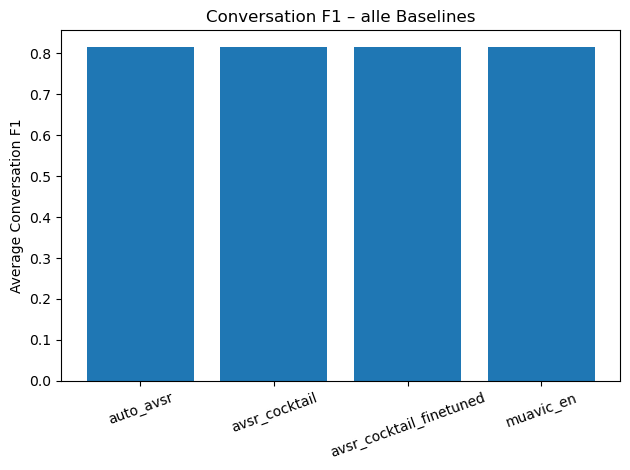

In [26]:
import matplotlib.pyplot as plt

# Zur Sicherheit einheitliche Reihenfolge
baseline_results = baseline_results.sort_values("model")

# Plot 1: Conversation F1
plt.figure()
plt.bar(baseline_results["model"], baseline_results["avg_conv_f1"])
plt.ylabel("Average Conversation F1")
plt.title("Conversation F1 – alle Baselines")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


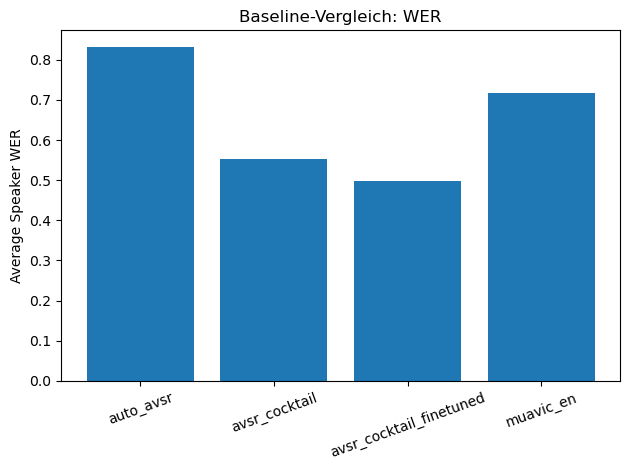

In [27]:
# Plot 2: Speaker WER (niedriger = besser)
plt.figure()
plt.bar(baseline_results["model"], baseline_results["avg_speaker_wer"])
plt.ylabel("Average Speaker WER")
plt.title("Baseline-Vergleich: WER")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
# Optional:
# plt.savefig("baseline_wer.png", dpi=300, bbox_inches="tight")


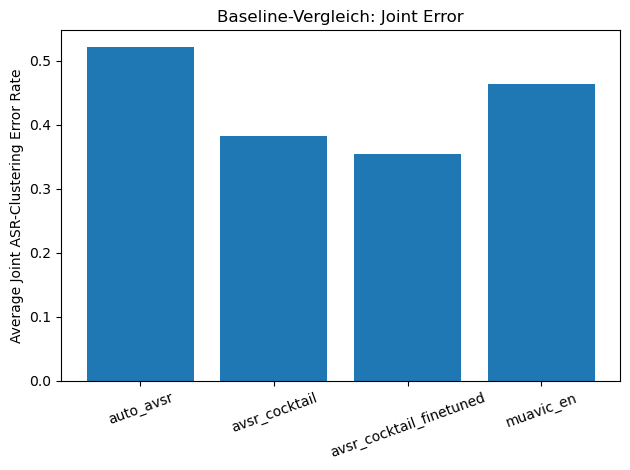

In [28]:
# Plot 3: Joint ASR-Clustering Error Rate (niedriger = besser)
plt.figure()
plt.bar(baseline_results["model"], baseline_results["avg_joint_error"])
plt.ylabel("Average Joint ASR-Clustering Error Rate")
plt.title("Baseline-Vergleich: Joint Error")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
# Optional:
# plt.savefig("baseline_joint_error.png", dpi=300, bbox_inches="tight")
